In [5]:
import pandas as pd
import sqlite3 as sql

import matplotlib.pyplot as plt
import numpy as np

In [4]:
# DB file
db_file = '../database/cortona_week.db'

# create a connection
cn = sql.connect(db_file)


In [6]:
query="""
-- Count the participants per conference
WITH tw1 AS 
(
SELECT DISTINCT p.pk_person, e.date conference
FROM Person p 
	LEFT JOIN Participation pp on pp.fk_person = p.pk_person 
	LEFT JOIN Event e on pp.fk_event = e.pk_event 
WHERE e.date BETWEEN 1986 AND 1998
)
SELECT conference, COUNT(*) AS num
FROM tw1
GROUP BY conference
ORDER BY conference;
"""

In [10]:
# Create a cursor
cur = cn.cursor()
cur.execute(query)
# La méthode 'fetchall' permet de récupérer toutes les lignes
r = cur.fetchall()

In [12]:
participants_number = pd.DataFrame(r)
participants_number.columns=['conf', 'number']
participants_number.head()

,conf,number
0,1986,45
1,1987,7
2,1988,51
3,1989,57
4,1990,8


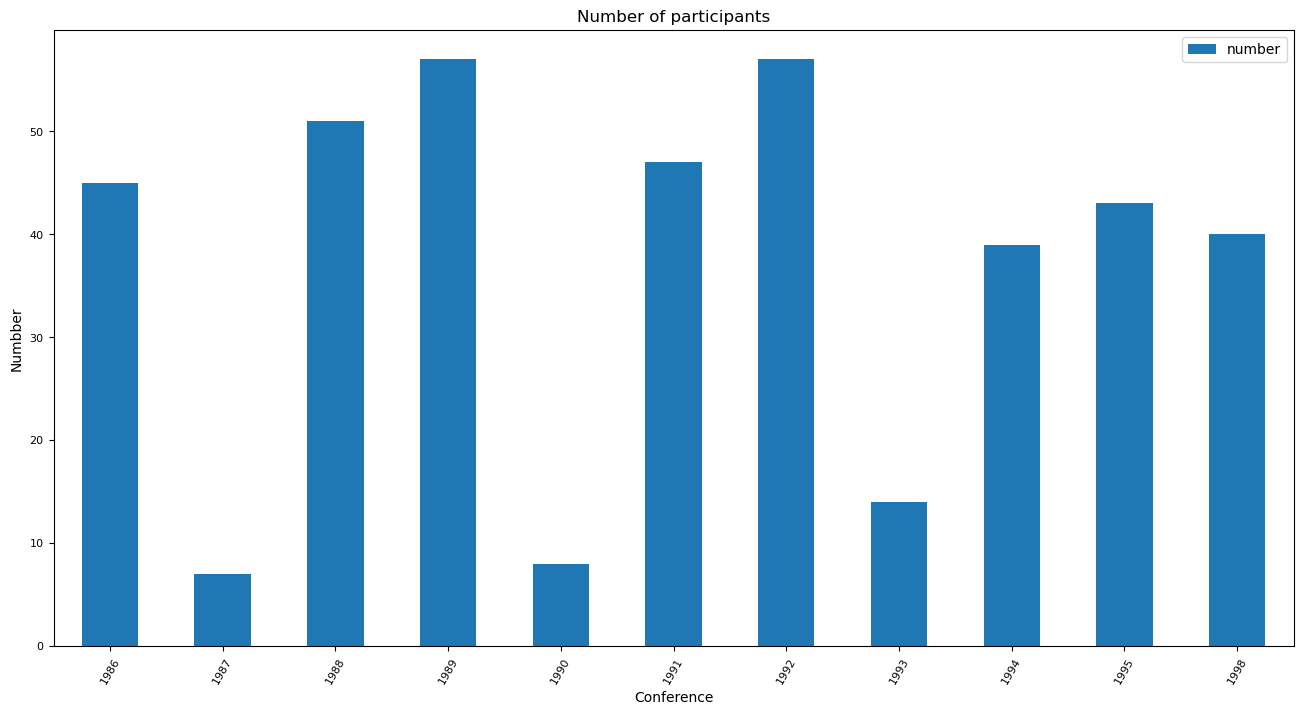

In [14]:
### Représentation graphique des effectifs par année

ax = participants_number.plot(x='conf', y='number', kind='bar',rot=60, fontsize=8, figsize=(16,8))


plt.ylabel('Numbber')
plt.xlabel('Conference')
plt.title('Number of participants')
plt.show()